# Performance assessment 
## Comparison of the openMP and MPI implementation

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

## Strong scaling : 

Keep the problem size the same and see how much faster we get

For X threads used, the name of the data would be OMP_X.
Code tested with 1, 4, 9, 16, and 25 threads. 

### nx = 120

In [3]:
from OMP_nx120 import *
from MPI_nx120 import *
from kParallel_nx120 import *

#### OMP

In [4]:
baseline_nx120 = baseline

#values that will be used for plotting :
OMP_thread = np.array([1, 4, 9, 16, 25])
OMP_time_nx120 = np.array([OMP_1, OMP_4, OMP_9, OMP_16, OMP_25])
OMP_speedup_nx120 = baseline_nx120 / OMP_time_nx120
print(OMP_speedup_nx120) 

[0.39 0.84 1.41 1.62 1.39]


#### MPI

In [5]:
#values that will be used for plotting : 
MPI_thread = np.array([2, 4, 9, 16, 24])
MPI_time_nx120 = np.array([MPI_2, MPI_4, MPI_9, MPI_16, MPI_24])
MPI_speedup_nx120 = baseline_nx120 / MPI_time_nx120

#### K-parallel

In [6]:
#values that will be used for plotting : 
K_thread = np.array([1, 4, 9, 16, 24])
K_time_nx120 = np.array([K_1, K_4, K_9, K_16, K_24])
K_speedup_nx120 = baseline_nx120 / K_time_nx120

### nx = 180

In [7]:
from OMP_nx180 import *
from MPI_nx180 import *
from kParallel_nx180 import *

#### OMP

In [8]:
baseline_nx180 = baseline

OMP_time_nx180 = np.array([OMP_1, OMP_4, OMP_9, OMP_16, OMP_25])
OMP_speedup_nx180 = baseline_nx180 / OMP_time_nx180

print(OMP_time_nx180)
print(OMP_speedup_nx180)

[4.13 1.57 1.02 0.84 1.11]
[0.41 1.08 1.66 2.01 1.53]


#### MPI

In [9]:
#values that will be used for plotting : 
MPI_time_nx180 = np.array([MPI_2, MPI_4, MPI_9, MPI_16, MPI_24])
MPI_speedup_nx180 = baseline_nx180 / MPI_time_nx180
print(MPI_time_nx180)

[2.41 1.5  1.46 1.54 1.6 ]


#### K-parallel

In [10]:
#values that will be used for plotting : 
K_time_nx180 = np.array([K_1, K_4, K_9, K_16, K_24])
K_speedup_nx180 = baseline_nx180 / K_time_nx180
K_time_nx180

array([1.78, 0.59, 0.39, 0.4 , 0.37])

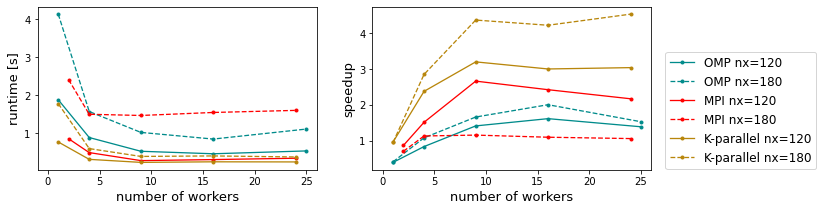

In [11]:
#nx120 OMP
fig, axs = plt.subplots(1, 2, figsize=(11, 3))

#OMP
axs[0].plot(OMP_thread, OMP_time_nx120, '-o', color = 'darkcyan', label = 'OMP nx=120', linewidth = 1.3, markersize = 3 )
axs[0].plot(OMP_thread, OMP_time_nx180, '--o', color = 'darkcyan', label = 'OMP nx=180', linewidth = 1.3, markersize = 3 )

#MPI 
axs[0].plot(MPI_thread, MPI_time_nx120, '-o', color = 'red', label = 'MPI nx=120',linewidth = 1.3, markersize = 3 ) 
axs[0].plot(MPI_thread, MPI_time_nx180, '--o', color = 'red', label = 'MPI nx=180',linewidth = 1.3, markersize = 3  )

#K 
axs[0].plot(K_thread, K_time_nx120, '-o', color = 'darkgoldenrod', label = 'K-parallel nx=120',linewidth = 1.3, markersize = 3  )
axs[0].plot(K_thread, K_time_nx180, '--o', color = 'darkgoldenrod', label = 'K-parallel nx=180',linewidth = 1.3, markersize = 3  )

# ---- BASELINE
#axs[0].plot([-2,27], np.ones(2)*baseline_nx120, '--', color = 'darkcyan' , linewidth = 1.3 )
#axs[0].plot([-2,27], np.ones(2)*baseline_nx180, '--', color = 'orange' , linewidth = 1.3 )
# ----- 

axs[0].set_xlabel("number of workers", fontsize = 13)
axs[0].set_ylabel("runtime [s]", fontsize = 13)
axs[0].set_xlim(-1, 26)


#OMP
axs[1].plot(OMP_thread, OMP_speedup_nx120, '-o', color = 'darkcyan',linewidth = 1.3 , markersize = 3)
axs[1].plot(OMP_thread, OMP_speedup_nx180, '--o', color = 'darkcyan',linewidth = 1.3 , markersize = 3)

#MPI
axs[1].plot(MPI_thread, MPI_speedup_nx120, '-o', color = 'red',linewidth = 1.3 , markersize = 3)
axs[1].plot(MPI_thread, MPI_speedup_nx180, '--o', color = 'red',linewidth = 1.3 , markersize = 3)

#K-parallel 
axs[1].plot(K_thread, K_speedup_nx120, '-o', color = 'darkgoldenrod',linewidth = 1.3 , markersize = 3)
axs[1].plot(K_thread, K_speedup_nx180, '--o', color = 'darkgoldenrod',linewidth = 1.3 , markersize = 3)

axs[1].set_xlabel("number of workers", fontsize = 13)
axs[1].set_ylabel("speedup", fontsize = 13)
axs[1].set_xlim(-1, 26)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.91,0.1), fontsize = 12)

plt.savefig("strong_scaling.pdf", bbox_inches = 'tight')


### OpenMP weak scaling : 

Keep the problem size per processor the same and see how much we lose

For X threads used, the name of the data would be OMP_X 
Code tested with 1, 4, 9, 16, and 25 threads 

In [12]:
from OMP_weakScaling import *

In [13]:
#domain_size = np.array([60, 120, 180, 240, 300])
OMP_thread = np.array([1, 4, 9, 16, 25])
OMP_time_ws = np.array([OMP_1, OMP_4, OMP_9, OMP_16, OMP_25])
print(OMP_time_ws)
OMP_par_efficiency = OMP_time_ws[0] / OMP_time_ws
print(OMP_par_efficiency)

[0.72 0.88 1.02 1.32 2.9 ]
[1.   0.81 0.7  0.54 0.25]


In [14]:
from MPI_weakScaling import *

In [15]:
MPI_time_ws = np.array([MPI_2, MPI_4, MPI_9, MPI_16, MPI_24])
print(MPI_time_ws)
MPI_par_efficiency = MPI_time_ws[0] / MPI_time_ws
print(MPI_par_efficiency)

[0.45 0.48 1.46 3.56 5.14]
[1.   0.94 0.31 0.13 0.09]


#### K-parallel

In [18]:
from kParallel_weakScaling_Horiz import *

In [19]:
#values that will be used for plotting : 
Kh_thread = np.array([1, 4, 9, 16, 24])
Kh_time = np.array([K_1, K_4, K_9, K_16, K_24])
Kh_par_efficiency = Kh_time[0] / Kh_time
print(Kh_thread) 
print(Kh_time) 
print(Kh_par_efficiency)

[ 1  4  9 16 24]
[0.28 0.31 0.39 0.57 0.75]
[1.   0.91 0.72 0.49 0.38]


In [20]:
from kParallel_weakScaling_Vert import*

In [21]:
#values that will be used for plotting : 
Kv_thread = np.array([1, 4, 9, 16, 24])
Kv_time = np.array([K_1, K_4, K_9, K_16, K_24])
Kv_par_efficiency = Kv_time[0] / Kv_time

print(Kv_thread) 
print(Kv_time) 
print(Kv_par_efficiency)

[ 1  4  9 16 24]
[0.19 0.25 0.32 0.57 0.76]
[1.   0.76 0.59 0.33 0.25]


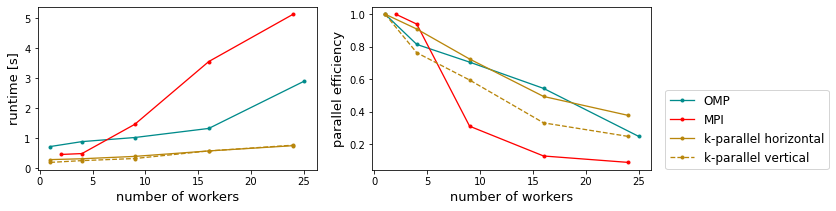

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(11, 3))

#runtime
axs[0].plot(OMP_thread, OMP_time_ws, '-o', color = 'darkcyan', label = 'OMP',linewidth = 1.3 , markersize = 3) 
axs[0].plot(MPI_thread, MPI_time_ws, '-o', color = 'red', label = 'MPI' ,linewidth = 1.3 , markersize = 3)
axs[0].plot(Kh_thread, Kh_time, '-o', color = 'darkgoldenrod', label = 'k-parallel horizontal' ,linewidth = 1.3 , markersize = 3)
axs[0].plot(Kv_thread, Kv_time, '--o', color = 'darkgoldenrod', label = 'k-parallel vertical' ,linewidth = 1.3 , markersize = 3)
axs[0].set_xlabel("number of workers", fontsize = 13)
axs[0].set_ylabel("runtime [s]", fontsize = 13)


#efficiency 
axs[1].plot(OMP_thread, OMP_par_efficiency, '-o', color = 'darkcyan',linewidth = 1.3 , markersize = 3)
axs[1].plot(MPI_thread, MPI_par_efficiency, '-o', color = 'red' ,linewidth = 1.3 , markersize = 3)
axs[1].plot(Kh_thread, Kh_par_efficiency, '-o', color = 'darkgoldenrod' ,linewidth = 1.3 , markersize = 3)
axs[1].plot(Kv_thread, Kv_par_efficiency, '--o', color = 'darkgoldenrod' ,linewidth = 1.3 , markersize = 3)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.91,0.1), fontsize = 12)

#axs[1].legend(["openMP"], loc = "lower left", bbox_to_anchor = (1,0))
axs[1].set_xlabel("number of workers", fontsize = 13)
axs[1].set_ylabel("parallel efficiency", fontsize = 13)

plt.savefig("weak_scaling.pdf", bbox_inches = 'tight')
